# Packages to Import

In [6]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim
#import ggplot
import seaborn as sns
import spacy
import logging
import warnings
import json
import logging
import os
import pyLDAvis.gensim
import matplotlib as mpl
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from spacy.lang.en import English

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Import Dataset

In [7]:
# Import Dataset
df1 = pd.read_json("Mckinsey_Articles.json")
print(df1.shape)
df1.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [8]:
df2=df1[df1['body'] != "NaN"]
print(df2.shape)
df2.head()

(215, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
2,,,https://healthcare.mckinsey.com/,,,
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...


In [9]:
df=df1[df1['body'] != ""]
print(df.shape)
df.head(215)

(194, 6)


,Article_date,Article_type,Article_url,author,body,titletext
0,February 2020,Article,https://www.mckinsey.com/industries/healthcare...,Shubham Singhal,"Healthcare is an essential, dynamic, and oppor...",\r\n\t\t\t\t\t\tSeven Healthcare Industry Tren...
1,February 2020,Interview,https://www.mckinsey.com/industries/healthcare...,,have made it possible to cheaply and quickly ...,"\r\n\t\t\t\t\t\tBig, bigger, biggest data: CTO..."
3,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,Today I am joined by Matt Holt who is a manag...,\r\n\t\t\t\t\t\tHow healthcare investing effor...
4,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Cathy and Tom, thank you so much for joining ...",\r\n\t\t\t\t\t\tThe role of academic-based hea...
5,December 2019,Article,https://www.mckinsey.com/industries/healthcare...,Zahy Abou-Atme,enrollment in provider-led health plans (PLHP...,\r\n\t\t\t\t\t\tHow should provider-led health...
6,October 2019,Interview,https://www.mckinsey.com/industries/healthcare...,Erica Coe,"Michael, it’s great to be speaking with you t...",\r\n\t\t\t\t\t\tWhy social determinants matter...
7,October 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,is a senior partner in McKinsey’s London offi...,\r\n\t\t\t\t\t\tFit for the future: The common...
8,November 2019,Podcast,https://www.mckinsey.com/industries/healthcare...,,"In 2017, total healthcare spending accounted f...",\r\n\t\t\t\t\t\tGetting the right care to the ...
9,November 2019,Article,https://www.mckinsey.com/industries/public-sec...,Naufal Khan,are the enabling technology behind state-leve...,\r\n\t\t\t\t\t\tInsights into better integrate...
11,January 2020,Podcast,https://www.mckinsey.com/industries/healthcare...,,"Today, I’m joined by Dr. Jim Weinstein, who i...",\r\n\t\t\t\t\t\tPicking winning strategies to ...


# Text Preprocessing

In [10]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.body.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['healthcare', 'is', 'an', 'essential', 'dynamic', 'and', 'opportunity', 'rich', 'industry', 'the', 'demand', 'for', 'innovation', 'to', 'drive', 'simultaneous', 'improvement', 'in', 'health', 'outcomes', 'affordability', 'quality', 'and', 'access', 'will', 'continue', 'to', 'be', 'high', 'as', 'we', 'look', 'ahead', 'we', 'suggest', 'keeping', 'an', 'eye', 'on', 'the', 'following', 'seven', 'trends', 'multiple', 'forces', 'including', 'the', 'mitigation', 'of', 'additional', 'funding', 'from', 'the', 'affordable', 'care', 'act', 'are', 'combining', 'to', 'form', 'headwinds', 'against', 'profit', 'pool', 'growth', 'in', 'healthcare', 'new', 'business', 'models', 'that', 'create', 'significant', 'healthcare', 'value', 'that', 'is', 'substantially', 'better', 'cost', 'quality', 'and', 'outcomes', 'will', 'be', 'critical', 'and', 'are', 'emerging', 'for', 'example', 'payers', 'reimagining', 'the', 'next', 'generation', 'managed', 'care', 'model', 'with', 'meaningful', 'engagement', 'in',

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

from spacy.lang.en import English

#!python -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [27]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"lean" + 0.016*"people" + 0.013*"time" + 0.012*"work" + '
  '0.012*"company" + 0.009*"leadership" + 0.008*"woman" + 0.008*"customer" + '
  '0.007*"look" + 0.007*"year"'),
 (1,
  '0.021*"plan" + 0.013*"consumer" + 0.013*"market" + 0.011*"contract" + '
  '0.011*"year" + 0.010*"network" + 0.010*"exhibit" + 0.009*"state" + '
  '0.009*"performance" + 0.009*"rating"'),
 (2,
  '0.012*"value" + 0.011*"company" + 0.009*"new" + 0.009*"service" + '
  '0.009*"healthcare" + 0.008*"health" + 0.006*"provider" + 0.006*"system" + '
  '0.006*"example" + 0.006*"datum"'),
 (3,
  '0.045*"care" + 0.036*"patient" + 0.026*"health" + 0.022*"system" + '
  '0.022*"hospital" + 0.015*"provider" + 0.012*"clinical" + 0.010*"case" + '
  '0.008*"quality" + 0.008*"cost"')]


In [13]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7118,"value, company, new, service, healthcare, heal...","[essential, dynamic, opportunity, rich, indust..."
1,1,3.0,0.5006,"care, patient, health, system, hospital, provi...","[possible, cheaply, quickly, sequence, genome,..."
2,2,2.0,0.8075,"value, company, new, service, healthcare, heal...","[today, join, manage, director, capital, inves..."
3,3,3.0,0.4777,"care, patient, health, system, hospital, provi...","[much, join, today, hope, focus, role, base, s..."
4,4,1.0,0.5113,"plan, consumer, market, contract, year, networ...","[enrollment, provider, lead, health, plan, plh..."
5,5,3.0,0.5890,"care, patient, health, system, hospital, provi...","[speak, today, critical, topic, give, percent,..."
6,6,1.0,0.8383,"plan, consumer, market, contract, year, networ...","[member, mckinsey, publishing, base]"
7,7,0.0,0.4682,"lean, people, time, work, company, leadership,...","[total, healthcare, spending, account, percent..."
8,8,2.0,0.8005,"value, company, new, service, healthcare, heal...","[enable, technology, state, level, service, pr..."
9,9,3.0,0.4090,"care, patient, health, system, hospital, provi...","[today, join, serve, system, discuss, perspect..."


In [14]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6658,"lean, people, time, work, company, leadership, woman, customer, look, year","[send, letter, employee, diversity, strength, work, closely, team, build, set, process, follow, ..."
1,1.0,0.9986,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[release, star_rating, give, multiple, source, volatility, market, include, recent, election, re..."
2,2.0,0.9994,"value, company, new, service, healthcare, health, provider, system, example, datum","[ambitious, vision, digitization, transform, core, business, service, industry, vision, typicall..."
3,3.0,0.9526,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[base, responsible, hospital, include, nationally, rank, nearly, health, center, clinic, follow,..."


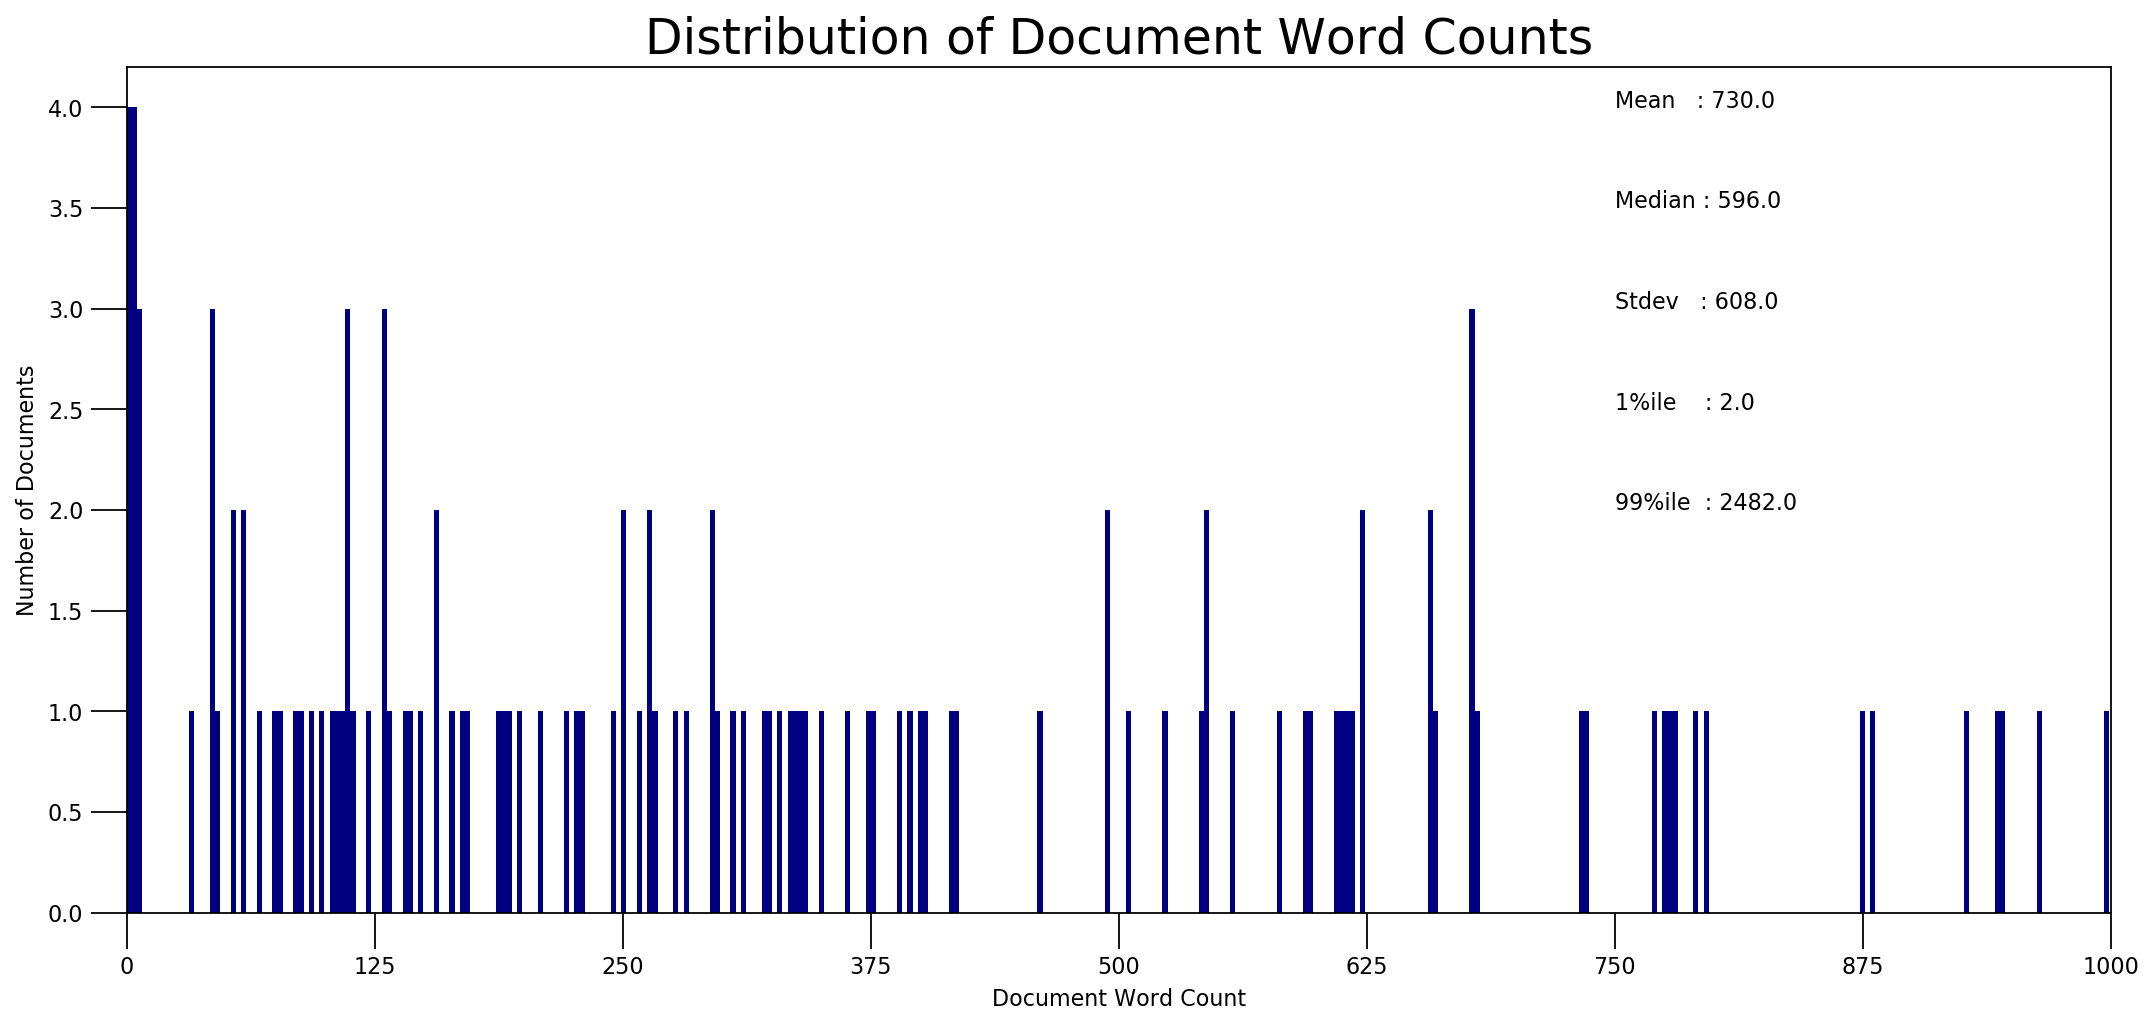

In [11]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 4, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  3.5, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  3, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  2.5, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  2, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

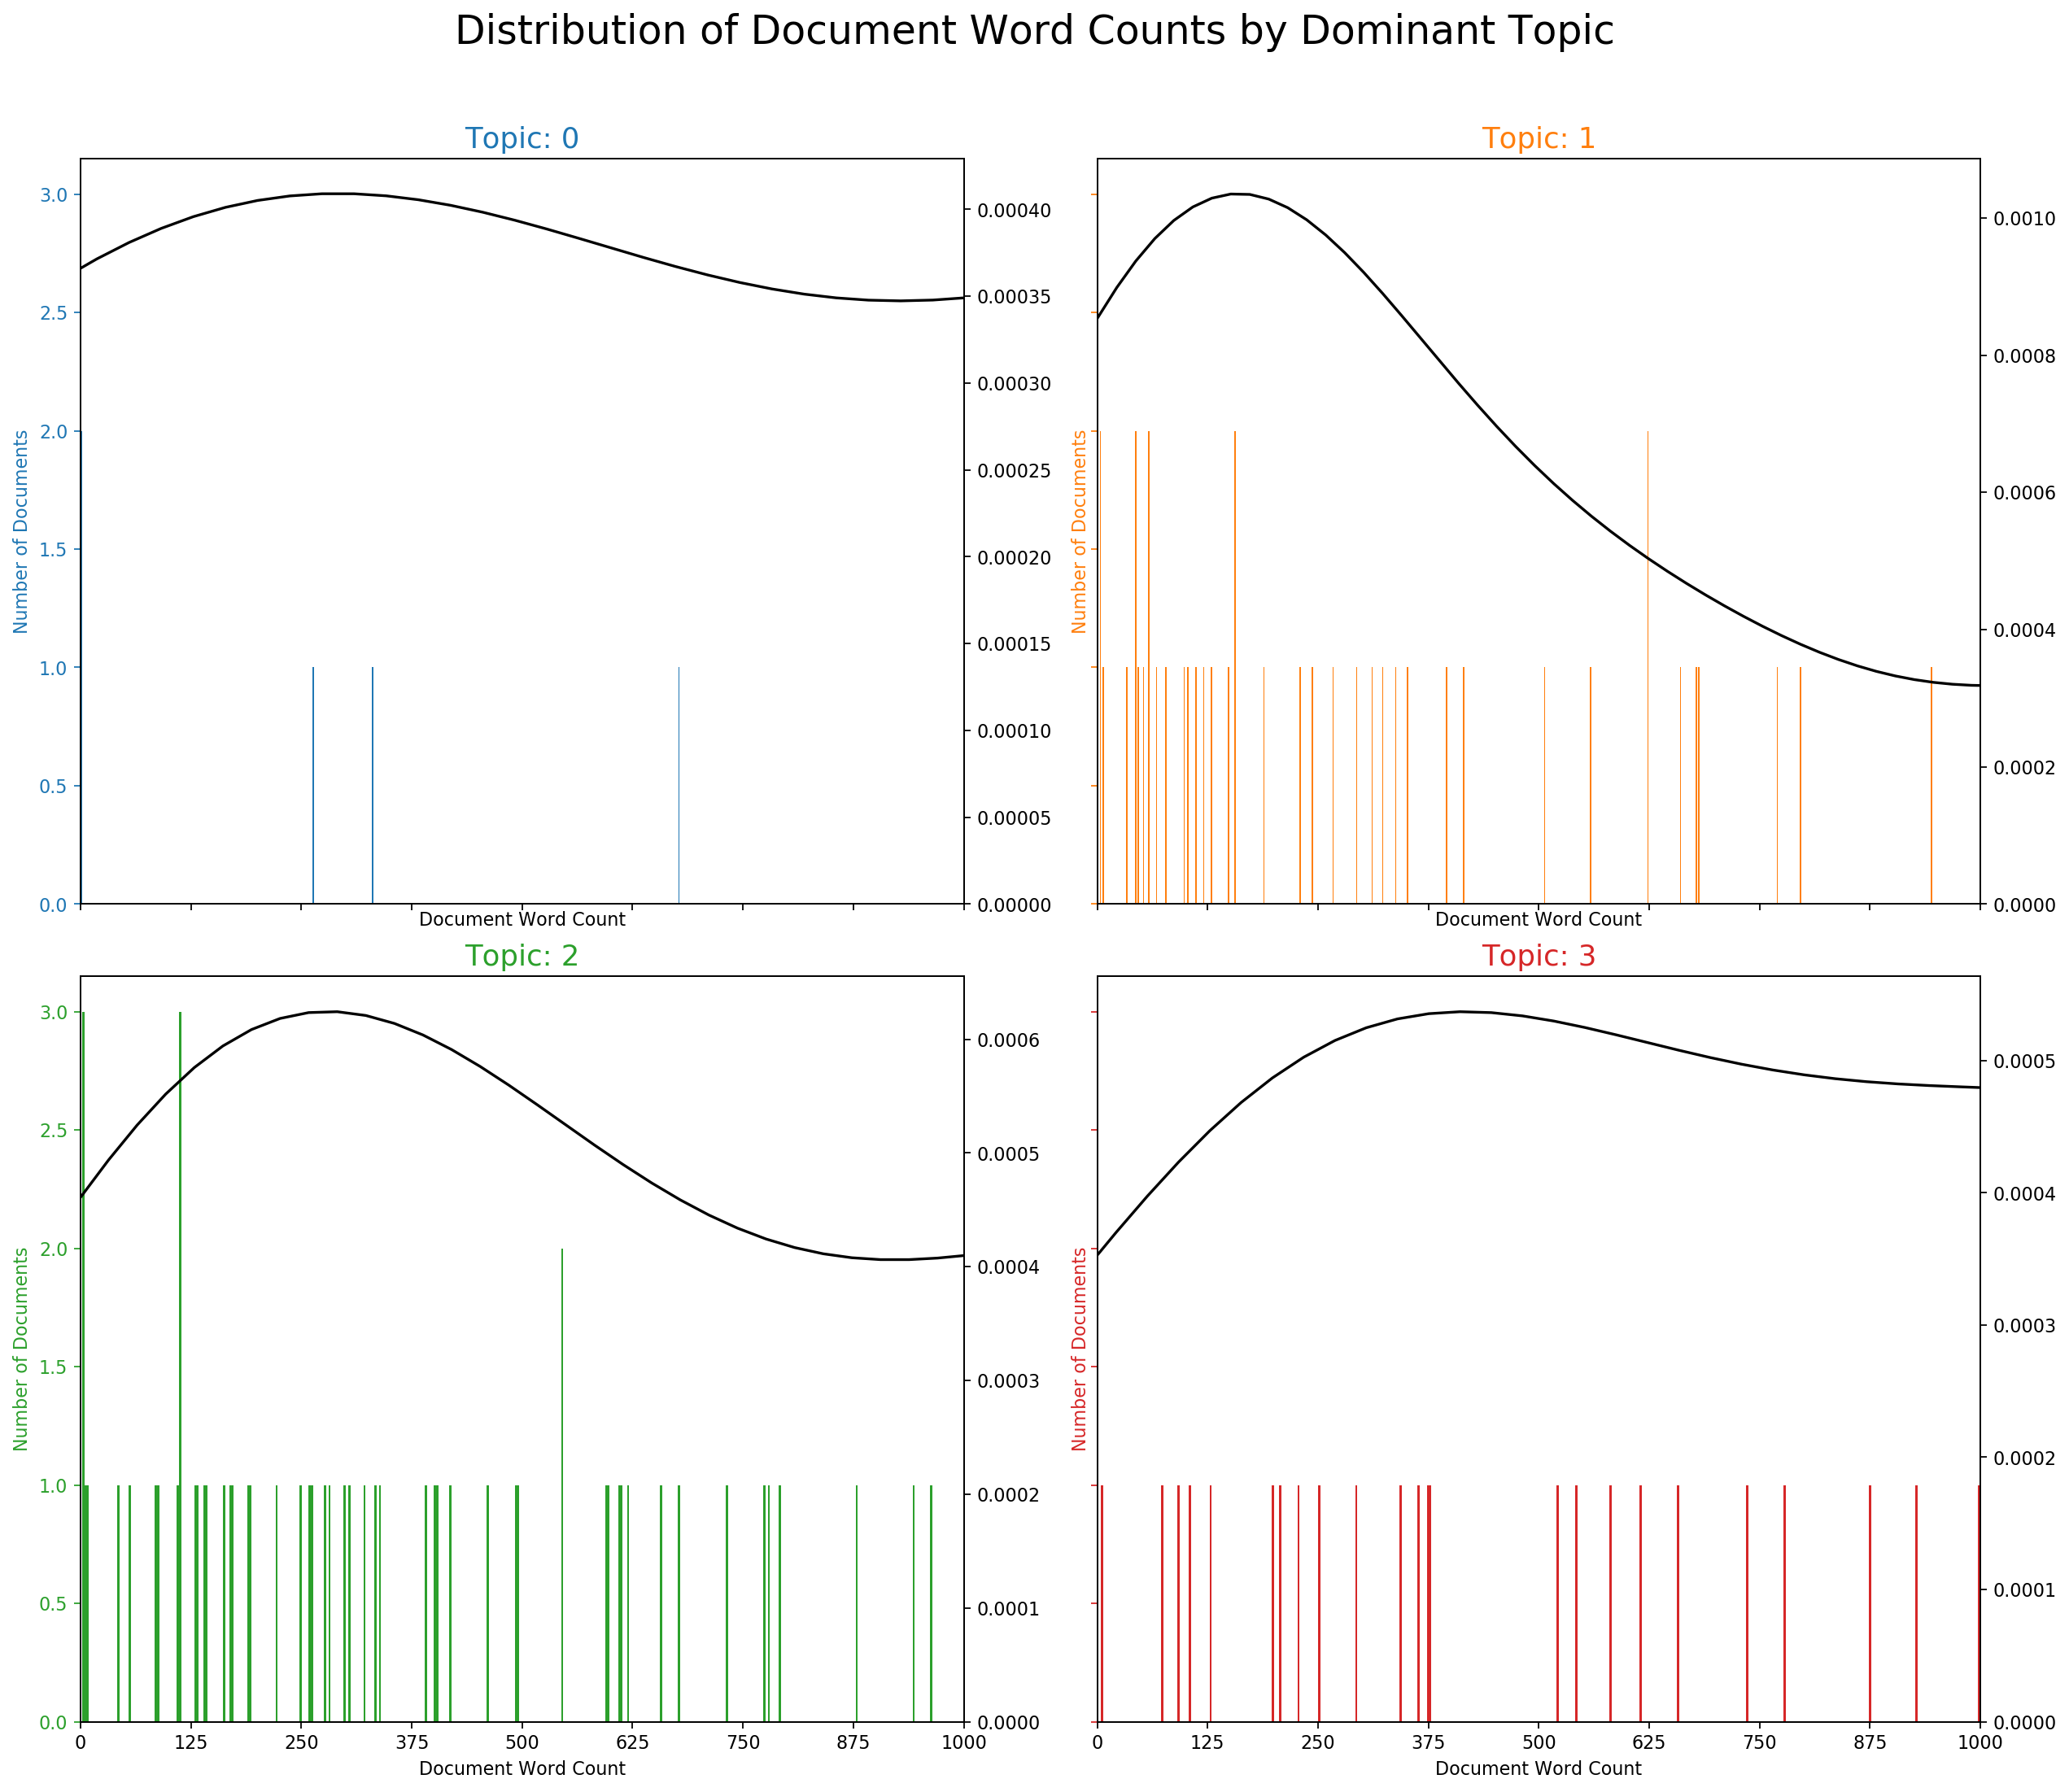

In [12]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

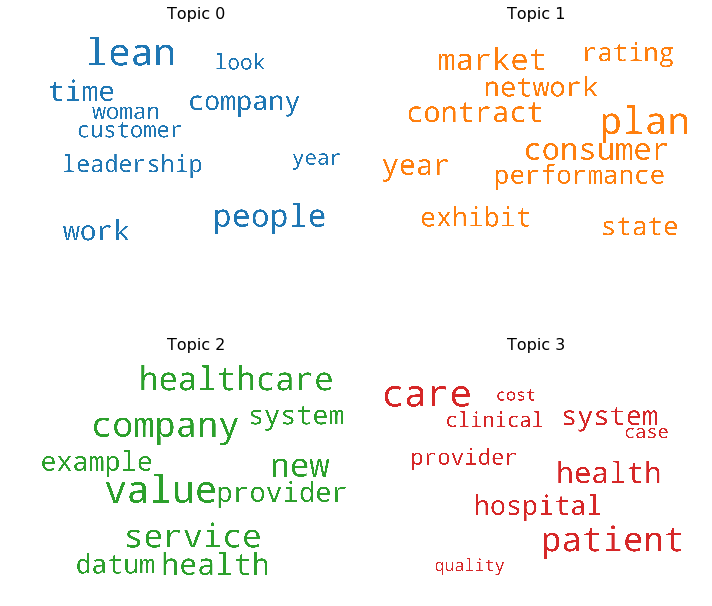

In [13]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

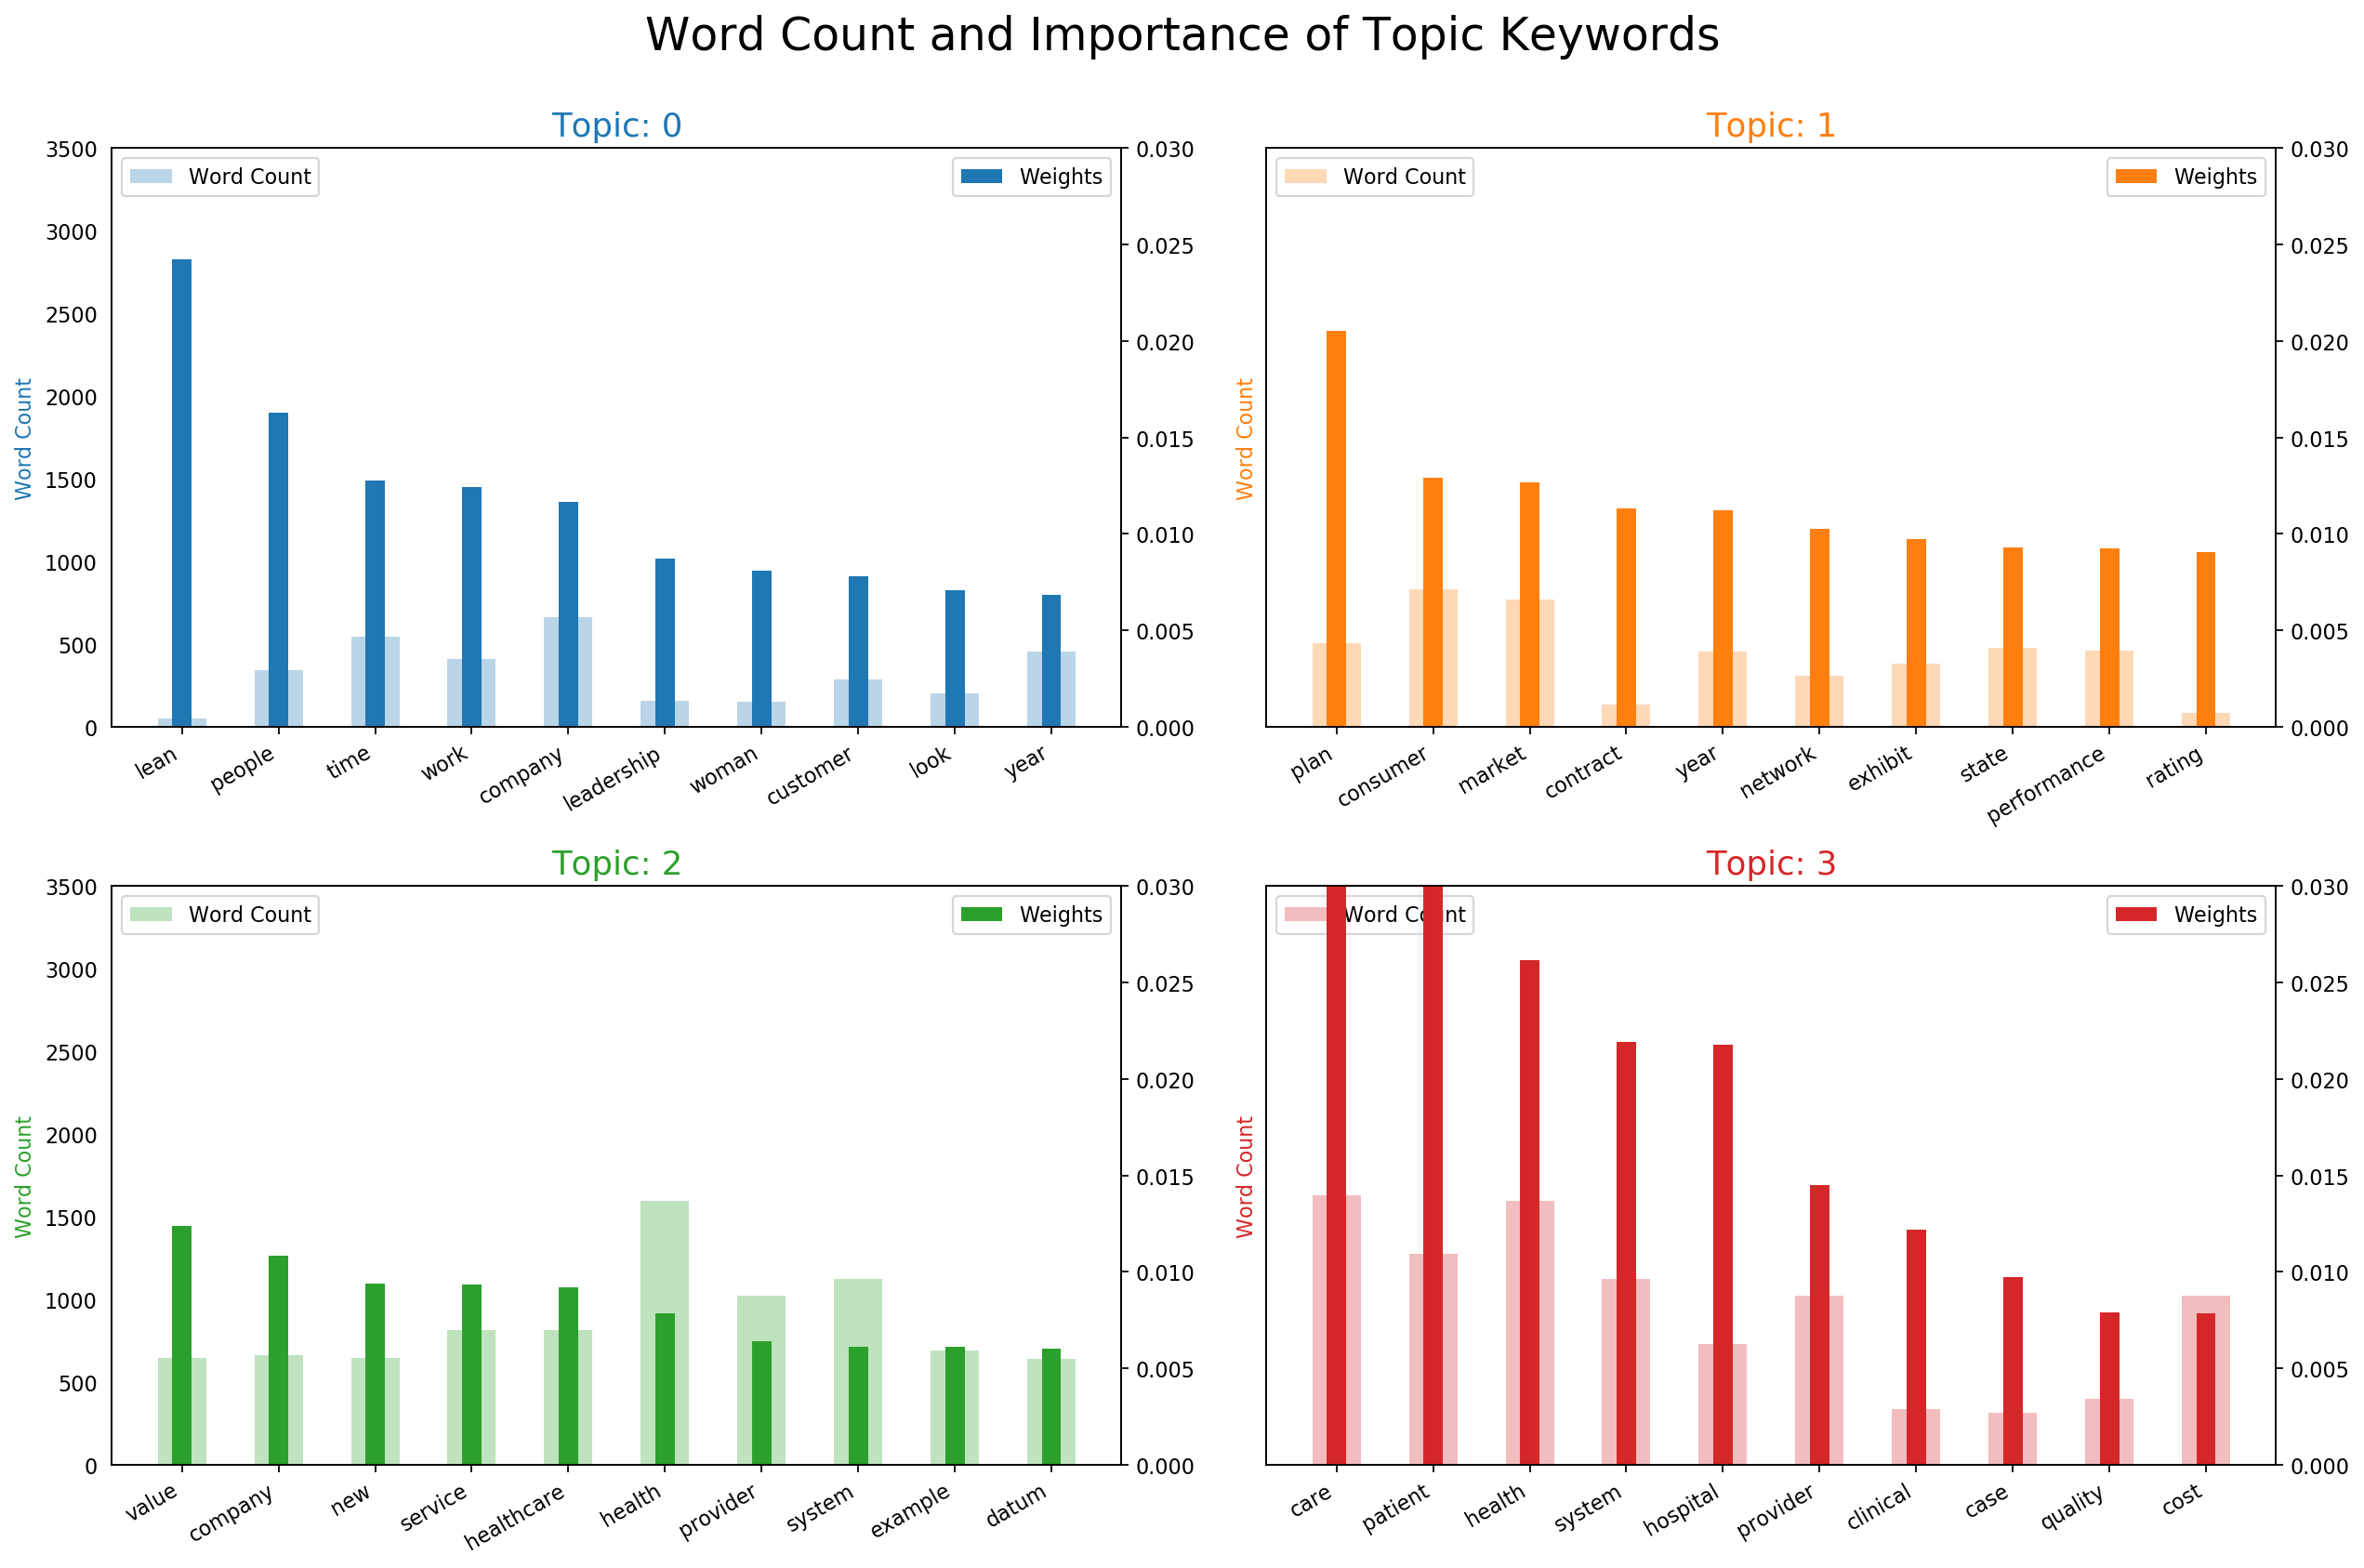

In [14]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

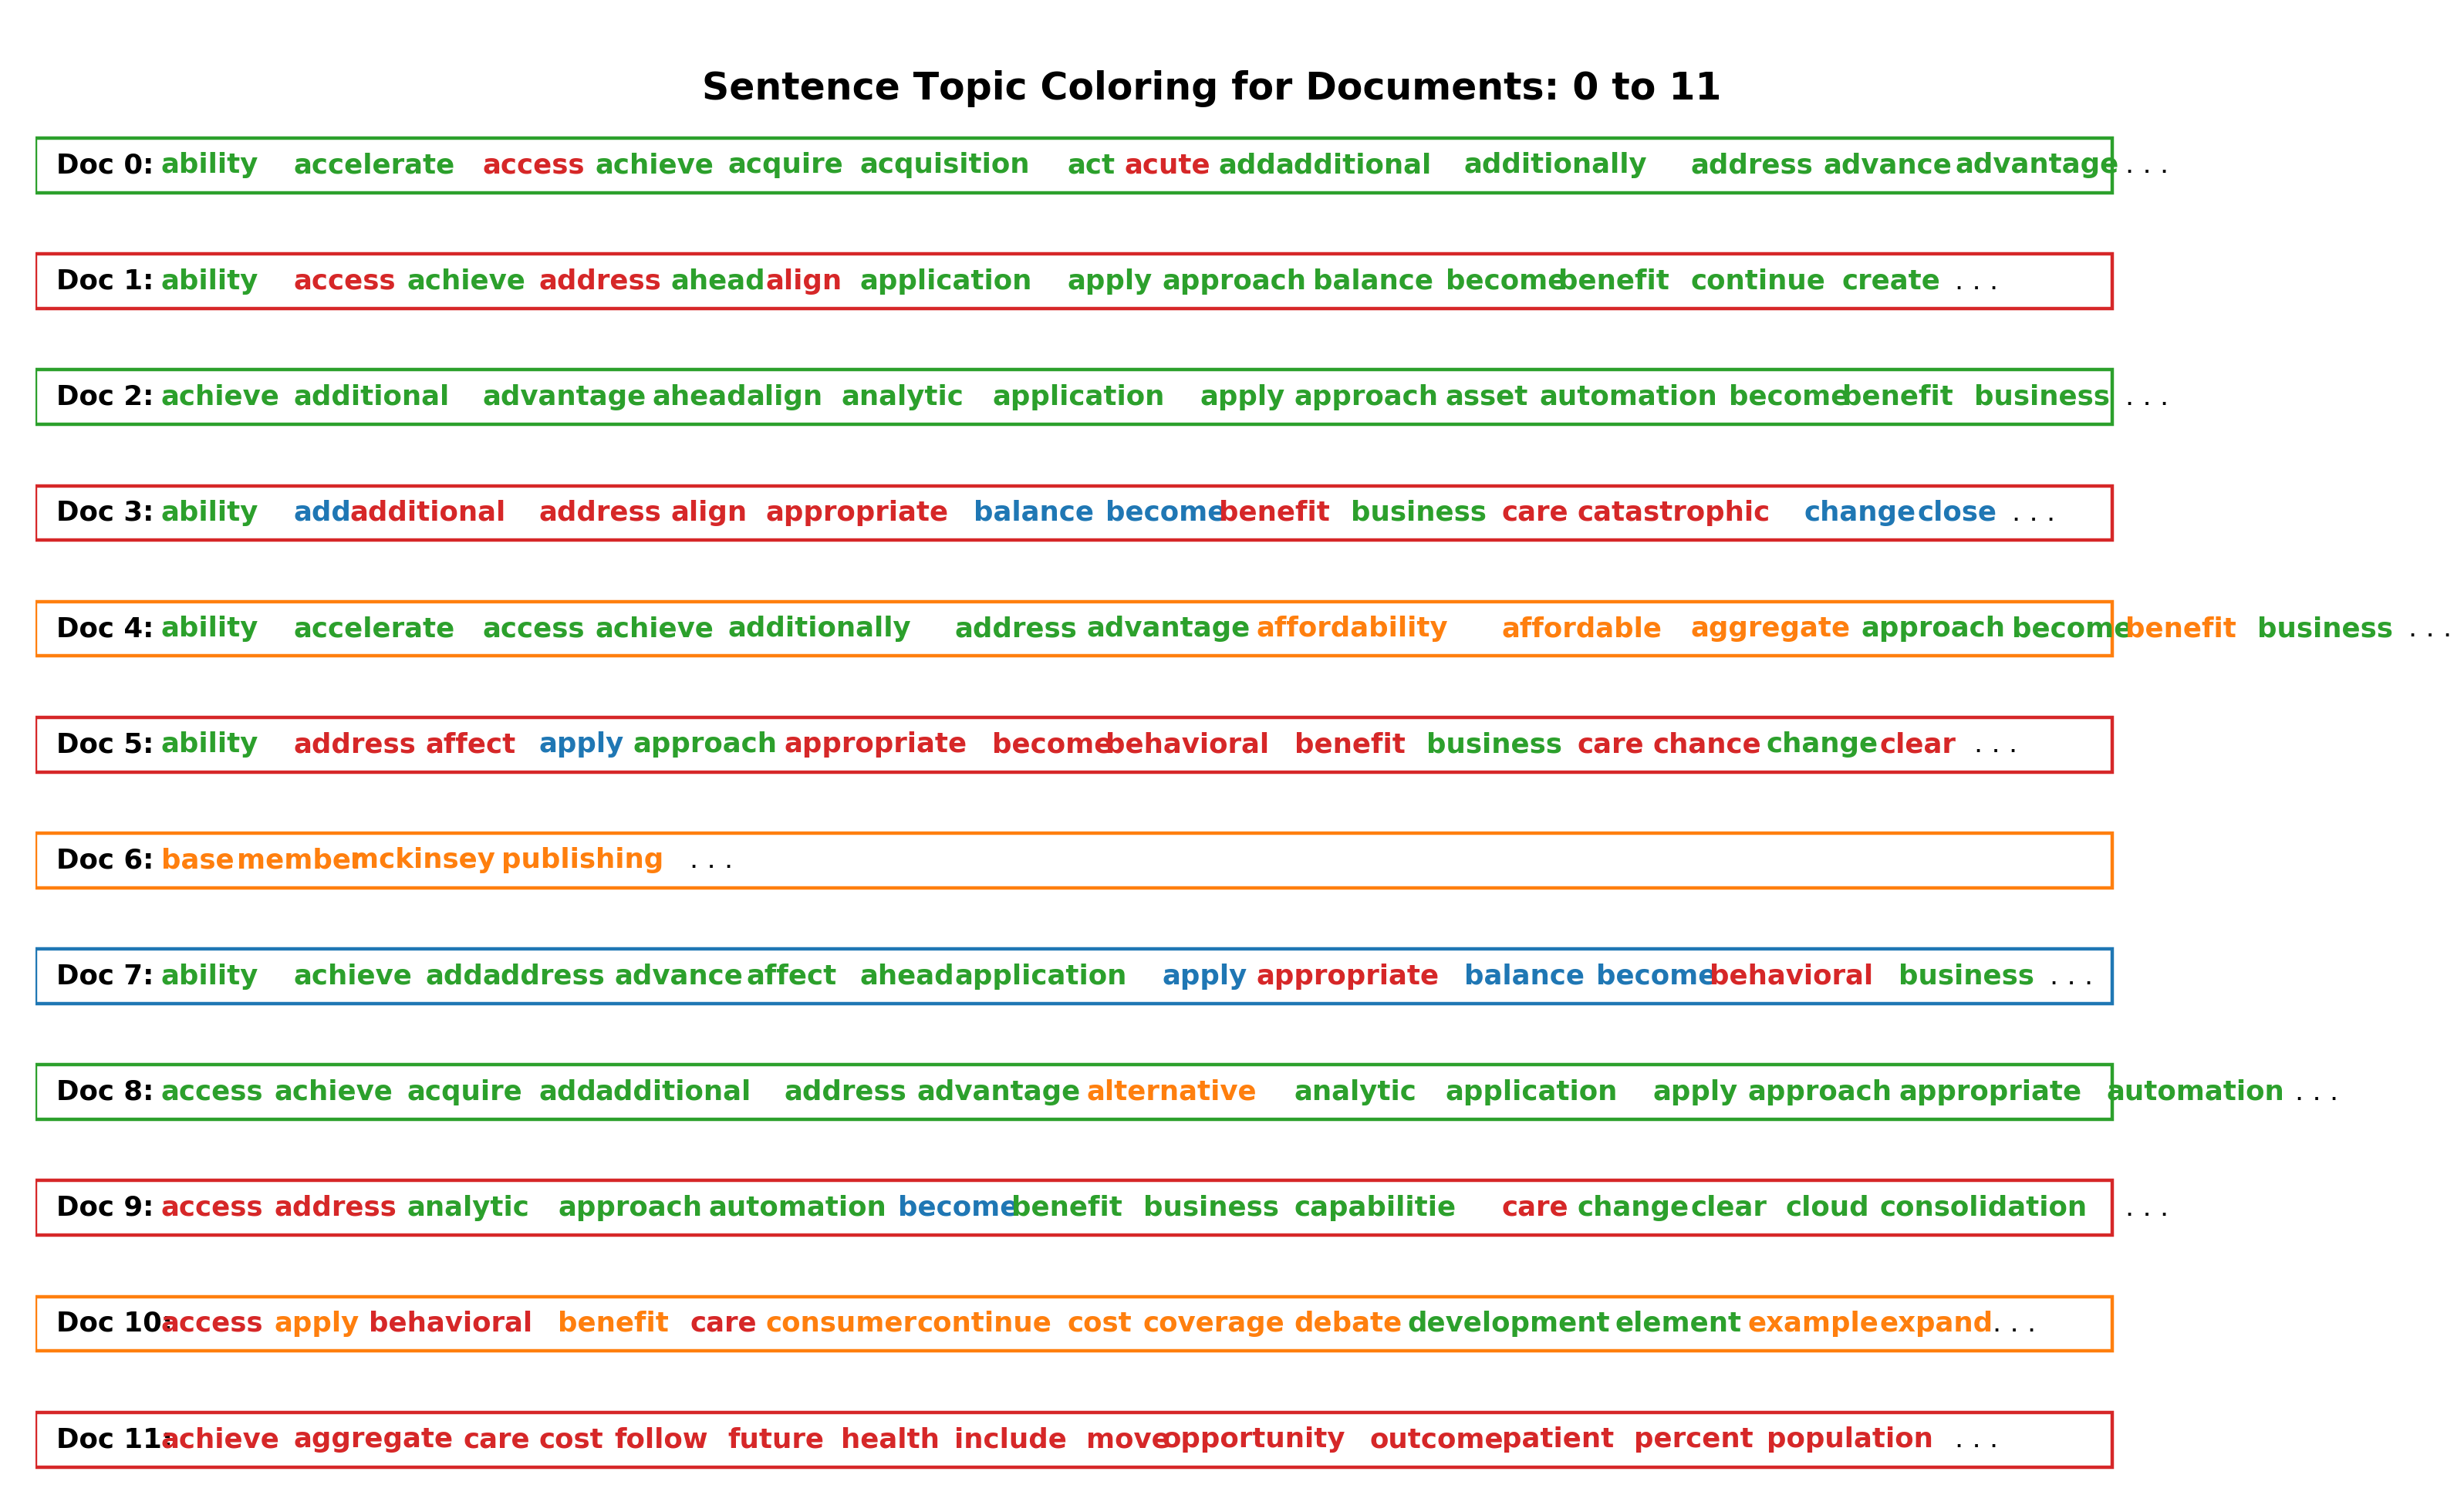

In [15]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

In [92]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

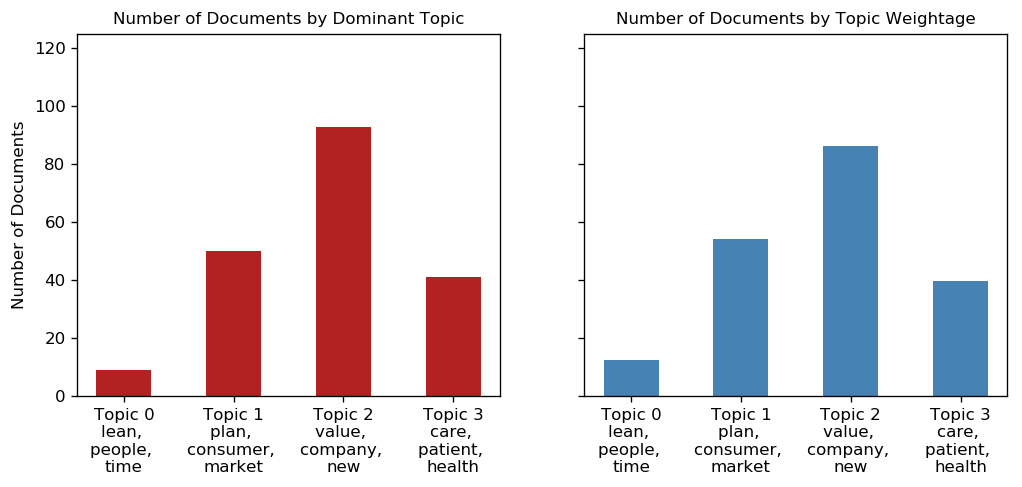

In [95]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 125)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [60]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 191 samples in 0.024s...
[t-SNE] Computed neighbors for 191 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 191 / 191
[t-SNE] Mean sigma: 0.183898
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.806396
[t-SNE] KL divergence after 1000 iterations: 0.209313


Loading BokehJS ...

In [58]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.059123 -0.003062       1        1  50.540878
3     -0.059824 -0.202237       2        1  23.324181
1     -0.159860  0.158477       3        1  19.203568
0      0.278807  0.046823       4        1   6.931379, topic_info=     Category         Freq          Term        Total  loglift  logprob
44    Default  1680.000000          care  1680.000000  30.0000  30.0000
201   Default  1236.000000       patient  1236.000000  29.0000  29.0000
452   Default   723.000000      hospital   723.000000  28.0000  28.0000
374   Default   889.000000       company   889.000000  27.0000  27.0000
298   Default  1162.000000        system  1162.000000  26.0000  26.0000
210   Default   597.000000          plan   597.000000  25.0000  25.0000
135   Default  1590.000000        health  1590.000000  24.0000  24.0000
1054  Default   238.000000          lean   238.000000  23.0000  23.0000
57    Default   689.000000      consumer   689.000000  22.0000  22.0000
175   Default   750.000000        market   750.000000  21.0000  21.0000
64    Default   459.000000      customer   459.000000  20.0000  20.0000
365   Default   452.000000      clinical   452.000000  19.0000  19.0000
586   Default   536.000000          time   536.000000  18.0000  18.0000
504   Default   274.000000        people   274.000000  17.0000  17.0000
1816  Default   308.000000      contract   308.000000  16.0000  16.0000
613   Default   287.000000          work   287.000000  15.0000  15.0000
320   Default   539.000000          year   539.000000  14.0000  14.0000
193   Default   428.000000  organization   428.000000  13.0000  13.0000
1248  Default   400.000000       exhibit   400.000000  12.0000  12.0000
570   Default   253.000000         state   253.000000  11.0000  11.0000
1304  Default   246.000000        rating   246.000000  10.0000  10.0000
1081  Default   355.000000       network   355.000000   9.0000   9.0000
146   Default   274.000000    individual   274.000000   8.0000   8.0000
1309  Default   246.000000        report   246.000000   7.0000   7.0000
206   Default   460.000000   performance   460.000000   6.0000   6.0000
230   Default  1107.000000      provider  1107.000000   5.0000   5.0000
608   Default   373.000000           way   373.000000   4.0000   4.0000
166   Default   226.000000        leader   226.000000   3.0000   3.0000
390   Default   250.000000       country   250.000000   2.0000   2.0000
580   Default   187.000000          team   187.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
1509   Topic4    37.382370     technique    49.089607   2.3967  -5.5705
1166   Topic4    31.129875          tell    40.143326   2.4148  -5.7535
265    Topic4    42.901272        senior    59.628326   2.3399  -5.4328
869    Topic4    33.937778         solve    47.215931   2.3389  -5.6672
67     Topic4    63.042164           day   109.677185   2.1154  -5.0479
613    Topic4   122.237068          work   287.462097   1.8140  -4.3857
453    Topic4    36.065941          idea    56.827236   2.2144  -5.6064
785    Topic4    41.015678       manager    68.797653   2.1519  -5.4777
170    Topic4    69.581436          look   152.677673   1.8833  -4.9492
319    Topic4    35.695927        worker    57.228748   2.1971  -5.6167
840    Topic4    54.798138       problem   119.040390   1.8933  -5.1880
586    Topic4   125.148254          time   536.817078   1.2130  -4.3622
347    Topic4    36.444138           big    65.642059   2.0807  -5.5959
2220   Topic4    38.500118     eliminate    82.679344   1.9048  -5.5410
374    Topic4   114.273376       company   889.568176   0.6170  -4.4531
809    Topic4    53.842297     operation   182.171539   1.4502  -5.2056
569    Topic4    52.531147         start   176.132629   1.4593  -5.2303
64     Topic4    76.726196      customer   459.363678   0.8795  -4.8515
580    Topic4    53.394726       

In [95]:
df_dominant_topic['Year']= df['Article_date']
df_dominant_topic.sort_values(by=['Year'],inplace=True, ascending=True)
df_dominant_topic['Year'] =  pd.to_datetime(df_dominant_topic['Year'], format='%B %Y', errors='coerce').dt.year
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Year
119,119,2.0,0.9820,"value, company, new, service, healthcare, health, provider, system, example, datum","[growth, major, change, strong, value_creation, potential, healthcare, exciting, industry, time,...",2009.0
146,146,3.0,0.4466,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[diagnostic, pre, non, healthcare, professional, account, almost, percent, project, profit_pool,...",2014.0
50,50,2.0,0.5231,"value, company, new, service, healthcare, health, provider, system, example, datum","[person, work, retail, industry, productivity, low, several, barrier, prevent, efficient, boost,...",2017.0
49,49,2.0,0.6037,"value, company, new, service, healthcare, health, provider, system, example, datum","[company, rarely, compete, price, require, consumer, amass, substantial, saving, afford, single,...",2017.0
87,87,3.0,0.5281,"care, patient, health, system, hospital, provider, clinical, case, quality, cost","[delivery, health, care, particularly, develop, country, offer, insight, tackle, rise, cost, est...",2017.0
137,137,1.0,0.9937,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[affordable, care, first, individual, market, close, conduct, fifth, individual, market, evolve,...",2018.0
139,139,1.0,0.8355,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[enrollment, project, grow, life, end, period, manage, expect, cover, enrollee, exhibit, diverse...",2018.0
145,145,1.0,0.4785,"plan, consumer, market, contract, year, network, exhibit, state, performance, rating","[ongoing, growth, cost, sharing, level, give, consumer, great, influence, healthcare, delivery, ...",2019.0
144,144,2.0,0.5752,"value, company, new, service, healthcare, health, provider, system, example, datum","[past, year, company, respond, sustained, healthcare, cost, pressure, adopt, number, significant...",2019.0
143,143,2.0,0.7901,"value, company, new, service, healthcare, health, provider, system, example, datum","[health, insurance, industry, continue, define, uncertainty, increasingly, look, uncertainty, st...",2019.0


In [80]:
df_sum = df_dominant_topic[df_dominant_topic['Topic_Perc_Contrib'] != 0]
#df_sum.head(10)

In [91]:
df_date=df_sum[df_sum['Year'] != 'NaN']
#df_date.head(215)

In [92]:
#Summary Statistics
print("Max: {}".format(df_sum['Topic_Perc_Contrib'].max()))
print("Min: {}".format(df_sum['Topic_Perc_Contrib'].min()))
print("Average: {}".format(df_sum['Topic_Perc_Contrib'].mean()))
print("Median: {}".format(df_sum['Topic_Perc_Contrib'].median()))
print("Most frequent value: {}".format(df_sum['Topic_Perc_Contrib'].round(3).value_counts().idxmax()))

Max: 0.9994000196456909
Min: 0.25
Average: 0.6480226808602048
Median: 0.6295500099658966
Most frequent value: 0.485


Text(0.5, 0.98, 'Scatterplot of Normalized Topic Weights, Split by Topic; All Weights.')

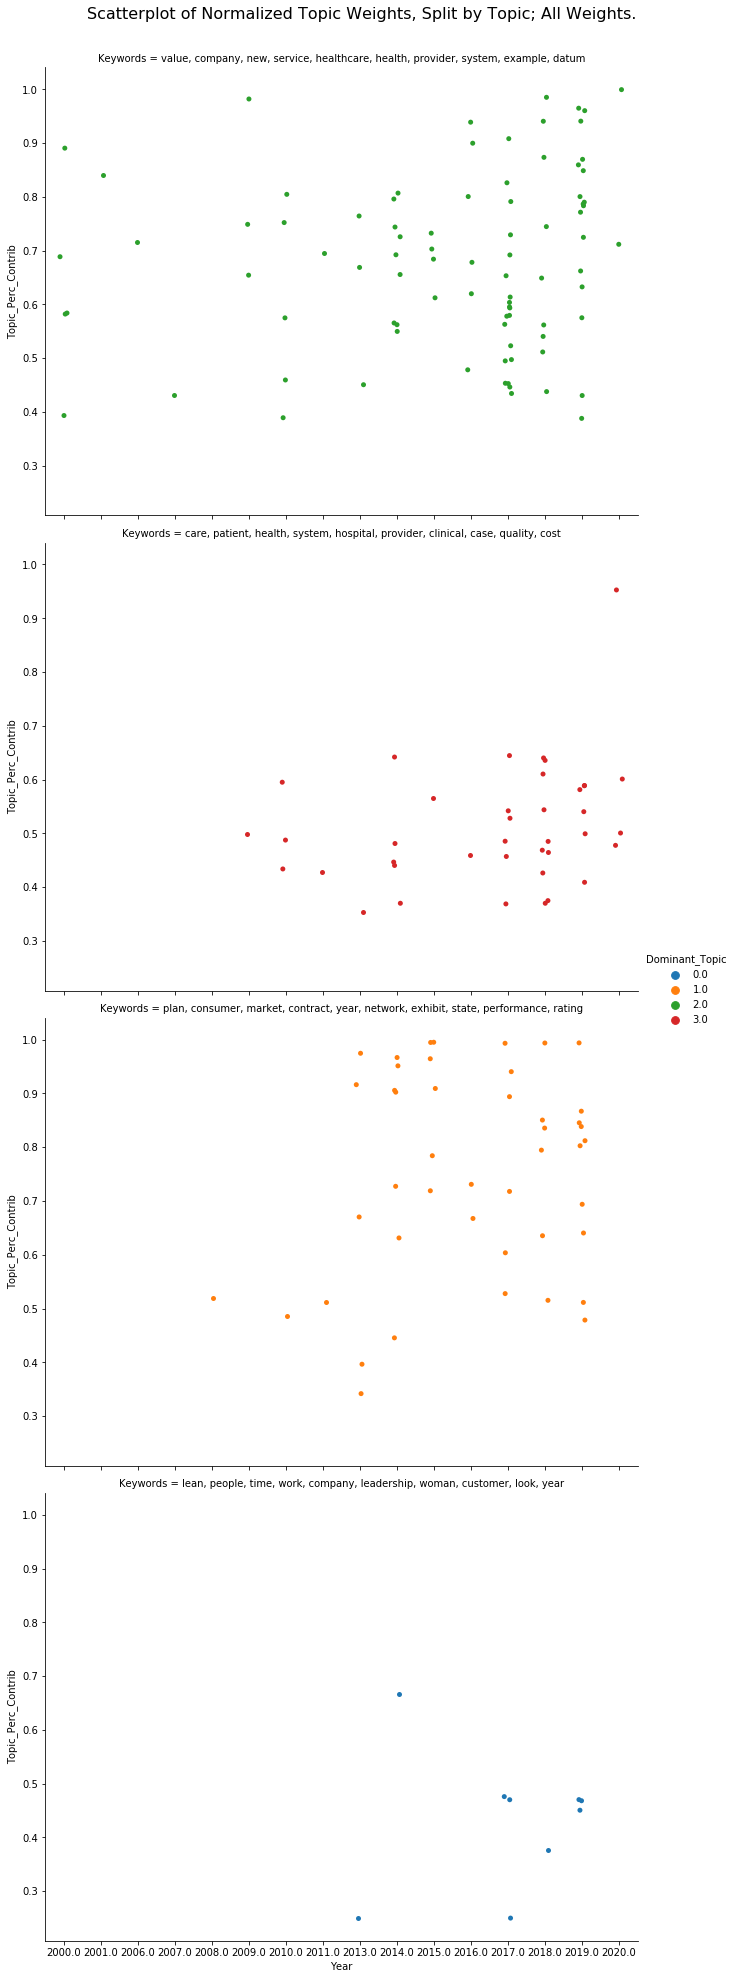

In [93]:
p = sns.catplot(x="Year", y='Topic_Perc_Contrib', hue='Dominant_Topic', col='Keywords', col_wrap=1, 
                   kind='strip', height=7, aspect=1.3, jitter=1, data=df_date)
p.fig.subplots_adjust(top=0.95)
p.fig.suptitle("Scatterplot of Normalized Topic Weights, Split by Topic; All Weights.", fontsize=16)

In [54]:
# order = ['lean, people, time, work, company, leadership, woman, customer, look, yeat',
#          'plan, consumer, market, contract, year, network, exhibit, state, performance, rating',
#          'value, company, new, service, healthcare, health, provider, system, example, datum',
#          'care, patient, health, system, hospital, provider, clinical, case, quality, cost',
#         ]

# def create_pointplot(df, y_value, hue=None, order=order, col=None, wrap=None, size=5, aspect=1.5, title=""):
#     p = sns.catplot(x="Year", y=y_value, kind='point', hue_order=order, hue=hue, 
#                        col=col, col_wrap=wrap, col_order=order, height=size, aspect=aspect, data=df)
#     p.fig.subplots_adjust(top=0.9)
#     p.fig.suptitle(title, fontsize=16)
#     return p

# def create_bar(df, y_value, hue=None, order=order, col=None, wrap=None, size=5, aspect=1.5, title=""):
#     p = sns.factorplot(x='Year', y=y_value, kind='bar', hue_order=order, hue=hue, 
#                        col=col, col_wrap=wrap, col_order=order, height=size, aspect=aspect, data=df)
#     p.fig.subplots_adjust(top=0.9)
#     p.fig.suptitle(title, fontsize=16)
#     return p

# create_pointplot(df_date, 'Topic_Perc_Contrib', hue='Keywords', order=order, size=5, aspect=1.5,
#                  title="Central Range of Normalized Topic Weights.")

In [1]:
# df_t0 = df_date[df_date['Dominant_Topic'] == 0]
# df_t0.head()
# plt.plot( 'Year', 'Topic_Perc_Contrib', data=df_t0, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'Year', 'Topic_Perc_Contrib', data=df_date, marker='', color='olive', linewidth=2)
# plt.plot( 'Year', 'Topic_Perc_Contrib', data=df_date, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

In [55]:
# order = ['lean, people, time, work, company, leadership, woman, customer, look, yeat',
#          'plan, consumer, market, contract, year, network, exhibit, state, performance, rating',
#          'value, company, new, service, healthcare, health, provider, system, example, datum',
#          'care, patient, health, system, hospital, provider, clinical, case, quality, cost',
#         ]

# g = sns.FacetGrid(df_date, col="Dominant_Topic", col_wrap=2, height=5, ylim=(0, 1))
# g.map(sns.pointplot, x='Year', y="Topic_Perc_Contrib", order=order, color="1", ci=None);

# Trying Different Models

In [2]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [56]:
texts= [bigram[line] for line in data_words]
# texts[10]

In [41]:
dictionary = Dictionary(texts)

In [42]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [43]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '-0.294*"around" + -0.269*"employer_sponsored" + -0.232*"incumbents" + -0.202*"performance" + -0.167*"leader" + -0.163*"between" + -0.149*"next_generation" + -0.145*"benefits" + -0.140*"will" + -0.136*"employment"'),
 (1,
  '-0.364*"around" + -0.343*"incumbents" + -0.313*"will" + 0.296*"benefits" + 0.274*"individual" + 0.219*"change" + -0.188*"performance" + 0.185*"shape" + 0.155*"security" + 0.140*"appropriate"'),
 (2,
  '0.287*"will" + -0.271*"benefits" + -0.261*"employer_sponsored" + 0.212*"incumbents" + 0.172*"journey" + -0.169*"differences" + 0.161*"shape" + -0.159*"between" + -0.159*"around" + -0.149*"leader"'),
 (3,
  '-0.366*"benefits" + 0.304*"differences" + 0.240*"shape" + 0.204*"global" + -0.180*"employer_sponsored" + -0.174*"incumbents" + -0.171*"change" + 0.153*"committee" + -0.149*"around" + -0.144*"next_generation"'),
 (4,
  '-0.393*"differences" + 0.319*"employment" + -0.271*"individual" + -0.251*"committee" + 0.200*"shape" + -0.196*"security" + 0.190*"expand" + 

In [44]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [45]:
hdpmodel.show_topics()

[(0,
  '0.011*incumbents + 0.011*will + 0.011*around + 0.008*employer_sponsored + 0.007*performance + 0.005*journey + 0.005*assets + 0.004*leader + 0.004*next_generation + 0.004*health + 0.004*employment + 0.004*de + 0.004*between + 0.004*rigueur + 0.003*possible + 0.003*benefits + 0.003*business + 0.003*change + 0.003*shop + 0.003*effort'),
 (1,
  '0.008*around + 0.007*differences + 0.007*shape + 0.006*global + 0.006*next_generation + 0.005*between + 0.005*employer_sponsored + 0.005*performance + 0.005*committee + 0.003*de + 0.003*seeing + 0.003*incumbents + 0.003*predictive + 0.003*alliances + 0.003*leader + 0.003*health + 0.003*generic + 0.003*good + 0.003*impact + 0.003*quite'),
 (2,
  '0.007*around + 0.006*leader + 0.006*employer_sponsored + 0.005*expand + 0.005*predictive + 0.005*performance + 0.005*modern + 0.005*employment + 0.005*incumbents + 0.005*good + 0.004*shape + 0.004*individual + 0.004*state + 0.004*between + 0.004*appropriate + 0.004*founding + 0.003*assets + 0.003*gl

In [48]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [49]:
ldamodel.show_topics()

[(0,
  '0.010*"incumbents" + 0.008*"performance" + 0.008*"will" + 0.008*"predictive" + 0.008*"leader" + 0.007*"global" + 0.007*"employment" + 0.007*"around" + 0.007*"employer_sponsored" + 0.006*"integrate"'),
 (1,
  '0.011*"incumbents" + 0.010*"around" + 0.008*"employer_sponsored" + 0.007*"leader" + 0.006*"benefits" + 0.006*"performance" + 0.006*"between" + 0.005*"employment" + 0.005*"business" + 0.005*"shape"'),
 (2,
  '0.012*"around" + 0.011*"incumbents" + 0.010*"performance" + 0.008*"between" + 0.006*"will" + 0.006*"leader" + 0.006*"employer_sponsored" + 0.006*"assets" + 0.006*"next_generation" + 0.005*"health"'),
 (3,
  '0.010*"founding" + 0.009*"employer_sponsored" + 0.008*"predictive" + 0.008*"leader" + 0.007*"incumbents" + 0.007*"around" + 0.007*"benefits" + 0.005*"will" + 0.005*"next_generation" + 0.005*"example"'),
 (4,
  '0.016*"around" + 0.011*"incumbents" + 0.009*"employer_sponsored" + 0.006*"between" + 0.006*"leader" + 0.006*"performance" + 0.006*"will" + 0.005*"de" + 0.00

In [59]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=dictionary)
vis1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.010261 -0.002407       1        1  31.035637
7     -0.009620  0.005020       2        1  30.043777
9     -0.004363  0.000972       3        1  10.037754
8     -0.000116 -0.002912       4        1   7.701625
4     -0.000131 -0.005188       5        1   6.657468
2      0.001277 -0.001649       6        1   5.703044
0      0.000612  0.007244       7        1   3.765287
3      0.009990  0.009702       8        1   2.937182
5      0.005052 -0.003622       9        1   1.356195
1      0.007559 -0.007161      10        1   0.762025, topic_info=     Category         Freq                Term        Total  loglift  logprob
44    Default  1555.000000              around  1555.000000  30.0000  30.0000
201   Default  1106.000000          incumbents  1106.000000  29.0000  29.0000
135   Default  1714.000000  employer_sponsored  1714.000000  28.0000  28.0000
230   Default   953.000000              leader   953.000000  27.0000  27.0000
298   Default  1149.000000         performance  1149.000000  26.0000  26.0000
57    Default   830.000000            benefits   830.000000  25.0000  25.0000
60    Default  1034.000000             between  1034.000000  24.0000  24.0000
452   Default   644.000000                will   644.000000  23.0000  23.0000
313   Default   525.000000          predictive   525.000000  22.0000  22.0000
136   Default   810.000000          employment   810.000000  21.0000  21.0000
374   Default   638.000000               shape   638.000000  20.0000  20.0000
268   Default   814.000000     next_generation   814.000000  19.0000  19.0000
202   Default   525.000000          individual   525.000000  18.0000  18.0000
100   Default   678.000000                  de   678.000000  17.0000  17.0000
47    Default   698.000000              assets   698.000000  16.0000  16.0000
175   Default   806.000000              global   806.000000  15.0000  15.0000
66    Default   612.000000            business   612.000000  14.0000  14.0000
144   Default   546.000000             example   546.000000  13.0000  13.0000
634   Default   522.000000                good   522.000000  12.0000  12.0000
586   Default   494.000000              effort   494.000000  11.0000  11.0000
137   Default   571.000000          engagement   571.000000  10.0000  10.0000
186   Default   643.000000              health   643.000000   9.0000   9.0000
1081  Default   253.000000            founding   253.000000   8.0000   8.0000
143   Default   492.000000              evolve   492.000000   7.0000   7.0000
204   Default   587.000000            innovate   587.000000   6.0000   6.0000
316   Default   515.000000              prices   515.000000   5.0000   5.0000
181   Default   449.000000                 had   449.000000   4.0000   4.0000
746   Default   494.000000            possible   494.000000   3.0000   3.0000
206   Default   442.000000         innovations   442.000000   2.0000   2.0000
126   Default   412.000000              easily   412.000000   1.0000   1.0000
...       ...          ...                 ...          ...      ...      ...
57    Topic10     6.478491            benefits   830.541443   0.0234  -5.1154
225   Topic10     3.634016             journey   381.470032   0.2233  -5.6935
66    Topic10     5.052866            business   612.304077   0.0797  -5.3639
400   Topic10     0.915607        successfully    59.672962   0.6999  -7.0720
586   Topic10     4.283590              effort   494.229919   0.1287  -5.5291
1872  Topic10     2.399128          enrollment   226.016006   0.3314  -6.1088
195   Topic10     2.526234                  in   242.864578   0.3112  -6.0571
634   Topic10     4.340365                good   522.279968   0.0867  -5.5159
374   Topic10     4.935894               shape   638.257812   0.0147  -5.3873
721   Topic10     3.321658             operate   396.724457   0.0942  -5.7834
126   Topic10     3.386352       

# Coherence Scores

In [50]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [51]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

print(lsi_coherence)
print(hdp_coherence)
print(lda_coherence)

0.42452218598078695
0.597678581781953
0.4171255682925219


In [52]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

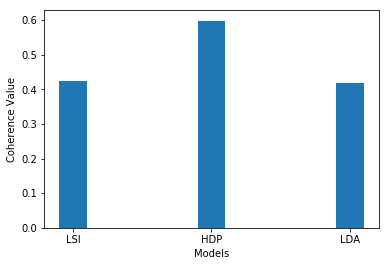

In [53]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])